**PRACTICA 1 - GRUPO C**

Integrantes: 
- Cervantes Rodríguez José de Jesús 
- Hadidi Abdelkrim 

In [21]:
# Librerias 

from PIL import Image
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import cv2


**Información de la Imagen**

In [22]:
ruta_imagen = "../Imagenes/Landscape.jpg" # ruta de la imagen 
imagen_PIL = Image.open(ruta_imagen) 

# A partir de la libreria PIL obtenemos datos de la imagen 
datos ={
'Formato': imagen_PIL.format,
'Tamaño' : imagen_PIL.size, # (ancho, alto)
'Canales' : imagen_PIL.mode # Comprobamos que contenga los 3 canales
}


tabla = pd.DataFrame.from_dict(datos, orient='index', columns=['Valor'])
print(tabla)

              Valor
Formato        JPEG
Tamaño   (640, 427)
Canales         RGB


**Tarea 1 Visualización de la imagen**

Imagen original.

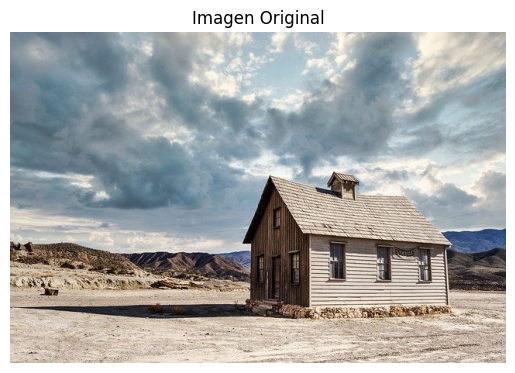

In [23]:
plt.imshow(imagen_PIL) # Mostramos imagen
plt.title("Imagen Original")
plt.axis('off')
plt.show()

Separación de los tres canales de color (Empezamos a utilizar OpenCv)

In [24]:
imagen_bgr = cv2.imread(ruta_imagen) 
blue_ch, green_ch, red_ch = cv2.split(imagen_bgr) # separamos los canales de color, OpenCV lo devuelve como BGR

Visualización de cada canal de color 

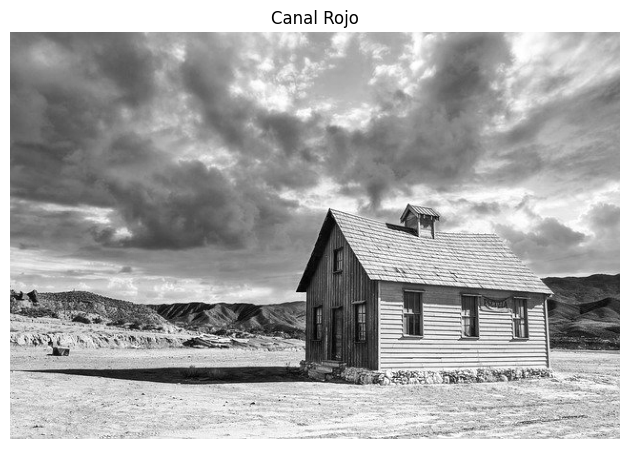

In [25]:
plt.figure()

plt.imshow(red_ch, cmap="gray") 
plt.title("Canal Rojo")
plt.axis('off')

plt.tight_layout() # ajustar automaticamente los parametros de la figura 
plt.show() # mostrar imagenes

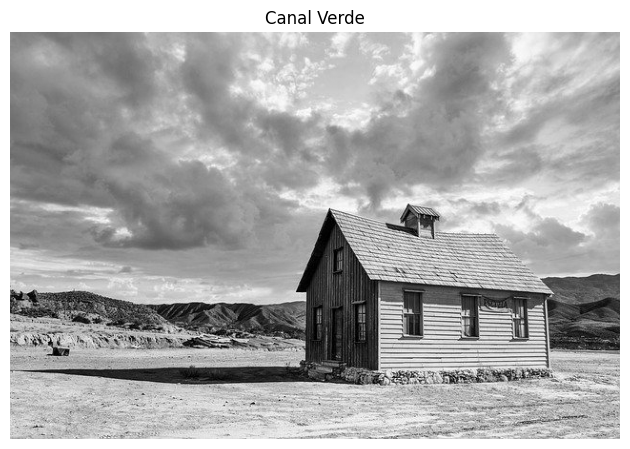

In [26]:
plt.figure()

plt.imshow(green_ch, cmap="gray") 
plt.title("Canal Verde")
plt.axis('off')

plt.tight_layout() # ajustar automaticamente los parametros de la figura 
plt.show() # mostrar imagenes

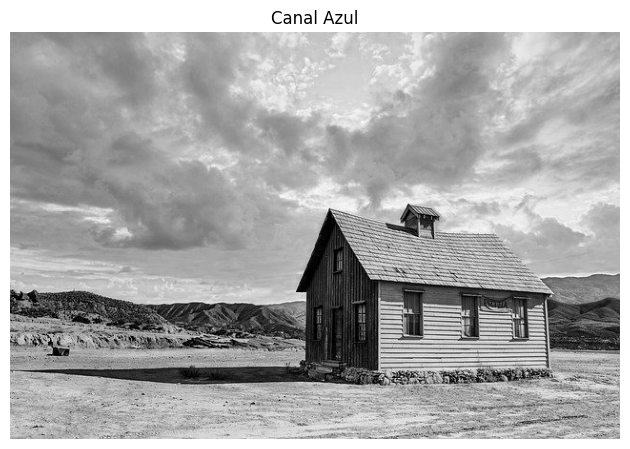

In [27]:
plt.figure()

plt.imshow(blue_ch, cmap="gray") 
plt.title("Canal Azul")
plt.axis('off')

plt.tight_layout() # ajustar automaticamente los parametros de la figura 
plt.show() # mostrar imagenes

**Tarea 2 Cálculo de valores estadísticos**

Convertimos las imagenes en arrays para hacer los calculos 

In [28]:
# Convertimos las imagenes en arrays para hacer los calculos 

red_arr = np.array(red_ch) # canal rojo
#print(red_arr)

green_arr = np.array(green_ch) # canal verde
#print(green_arr)

blue_arr = np.array(blue_ch) # canal azul 
#print(blue_arr)

Calculo de valores estadisticos

Canal Rojo

In [29]:
red_mean = np.mean(red_arr) # media del canal rojo
#print(red_mean)
red_std = np.std(red_arr) # desviación estandar canal rojo
#print(red_std)
red_var = np.var(red_arr) # varianza canal rojo 
#print(red_var)

Canal Verde

In [30]:
green_mean = np.mean(green_arr) # media del canal rojo
#print(green_mean)
green_std = np.std(green_arr) # desviación estandar canal rojo
#print(green_std)
green_var = np.var(green_arr) # varianza canal rojo 
#print(green_var)

Canal Azul

In [31]:
blue_mean = np.mean(blue_arr) # media del canal rojo
#print(blue_mean)
blue_std = np.std(blue_arr) # desviación estandar canal rojo
#print(blue_std)
blue_var = np.var(blue_arr) # varianza canal rojo 
#print(blue_var)

In [32]:
datos = {
    'Media': [red_mean, green_mean, blue_mean],
    'Std': [red_std, green_std, blue_std],
    'Varianza': [red_var, green_var, blue_var]
}

tabla = pd.DataFrame(datos, index=['Rojo', 'Verde', 'Azul'])
print(tabla)

            Media        Std     Varianza
Rojo   157.323233  56.728633  3218.137833
Verde  159.220506  53.888831  2904.006053
Azul   157.821838  52.427288  2748.620571


**Tarea 3 Operaciones aritméticas y booleanas**

Suma (Canal rojo + Canal Azul): 
 [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


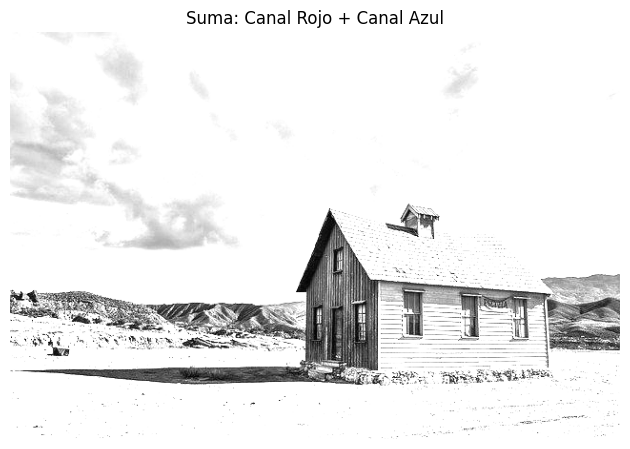

In [33]:
suma = cv2.add(red_ch, blue_ch)
print(f'Suma (Canal rojo + Canal Azul): \n {suma}')
#print(suma.shape) # alto, ancho 

plt.figure()
plt.imshow(suma, cmap="gray")  
plt.title("Suma: Canal Rojo + Canal Azul")
plt.axis('off')

plt.tight_layout()
plt.show()

Resta (Canal rojo - Canal Azul): 
 [[ 0  0  0 ...  5  6  6]
 [ 0  0  0 ...  5  6  6]
 [ 0  0  0 ...  6  6  6]
 ...
 [27 27 27 ... 32 32 32]
 [27 27 27 ... 32 32 32]
 [27 27 29 ... 34 34 34]]


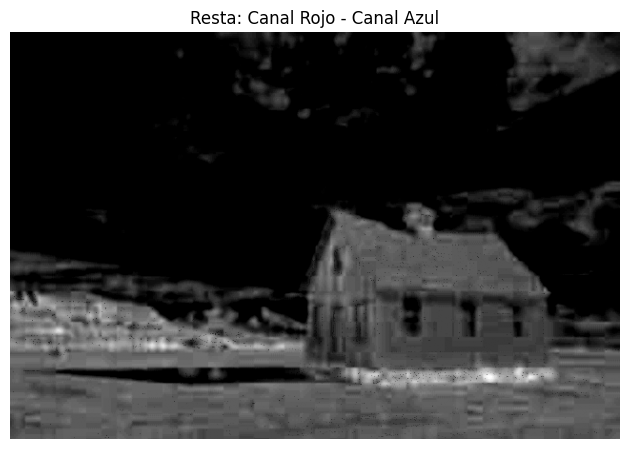

In [34]:
resta = cv2.subtract(red_ch, blue_ch)
print(f'Resta (Canal rojo - Canal Azul): \n {resta}')
#print(resta.shape) # alto, ancho 

plt.figure()
plt.imshow(resta, cmap="gray")  
plt.title("Resta: Canal Rojo - Canal Azul")
plt.axis('off')

plt.tight_layout()
plt.show()

Binarizamos las imagenes

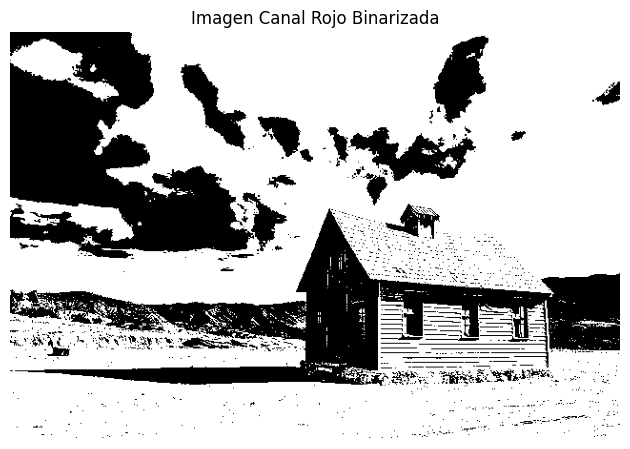

In [35]:
_, red_bin = cv2.threshold(red_ch, 127, 1, cv2.THRESH_BINARY)
#print(red_bin)
plt.figure()
plt.imshow(red_bin, cmap="gray") 
plt.title("Imagen Canal Rojo Binarizada")
plt.axis('off')

plt.tight_layout()
plt.show()

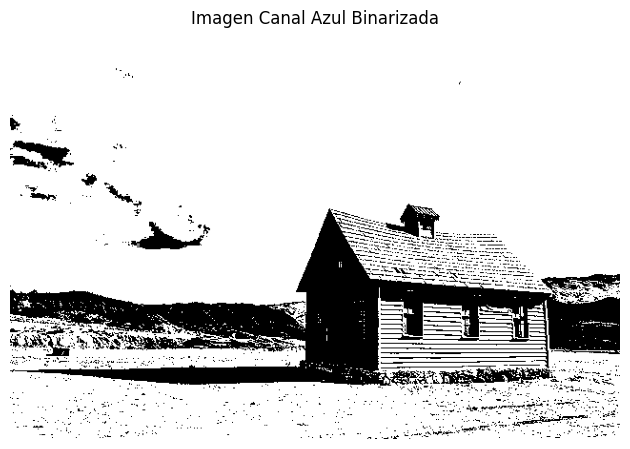

In [36]:
_, blue_bin = cv2.threshold(blue_ch, 127, 1, cv2.THRESH_BINARY)
#print(blue_bin)
plt.figure()
plt.imshow(blue_bin, cmap="gray")  
plt.title("Imagen Canal Azul Binarizada")
plt.axis('off')

plt.tight_layout()
plt.show()

Operacion Lógicas

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


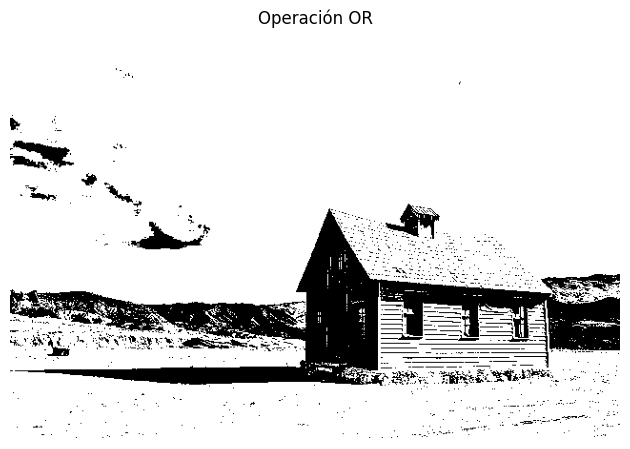

In [37]:
OR_op = cv2.bitwise_or(red_bin, blue_bin)
print(OR_op)
#print(OR_op.shape) # alto, ancho 

plt.figure()
plt.imshow(OR_op, cmap="gray")  # Cambia blue_ch por suma
plt.title("Operación OR")
plt.axis('off')

plt.tight_layout()
plt.show()

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
(427, 640)


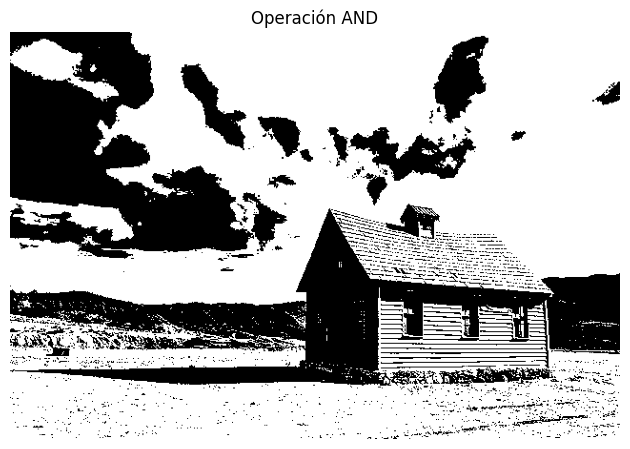

In [38]:
AND_op = cv2.bitwise_and(red_bin, blue_bin)
print(AND_op)
print(AND_op.shape) # alto, ancho 

plt.figure()
plt.imshow(AND_op, cmap="gray")  # Cambia blue_ch por suma
plt.title("Operación AND")
plt.axis('off')

plt.tight_layout()
plt.show()

**Tarea 4 Cálculo de histograma**

Histogramas de los canales originales

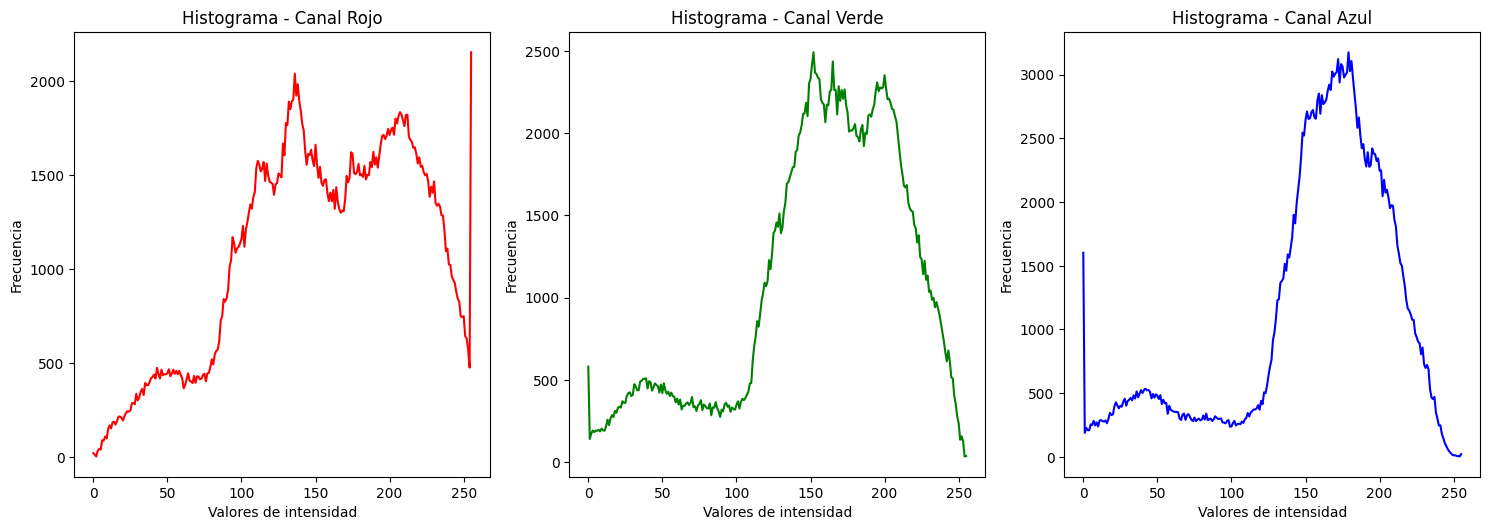

In [39]:

hist_red = cv2.calcHist([red_ch], [0], None, [256], [0, 256])
hist_green = cv2.calcHist([green_ch], [0], None, [256], [0, 256])
hist_blue = cv2.calcHist([blue_ch], [0], None, [256], [0, 256])


# Mostrar los histogramas de canales originales
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(hist_red, color='red')
plt.title('Histograma - Canal Rojo')
plt.xlabel('Valores de intensidad')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 2)
plt.plot(hist_green, color='green')
plt.title('Histograma - Canal Verde')
plt.xlabel('Valores de intensidad')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 3)
plt.plot(hist_blue, color='blue')
plt.title('Histograma - Canal Azul')
plt.xlabel('Valores de intensidad')
plt.ylabel('Frecuencia')



plt.tight_layout()
plt.show()


Histogramas de las operaciones aritméticas

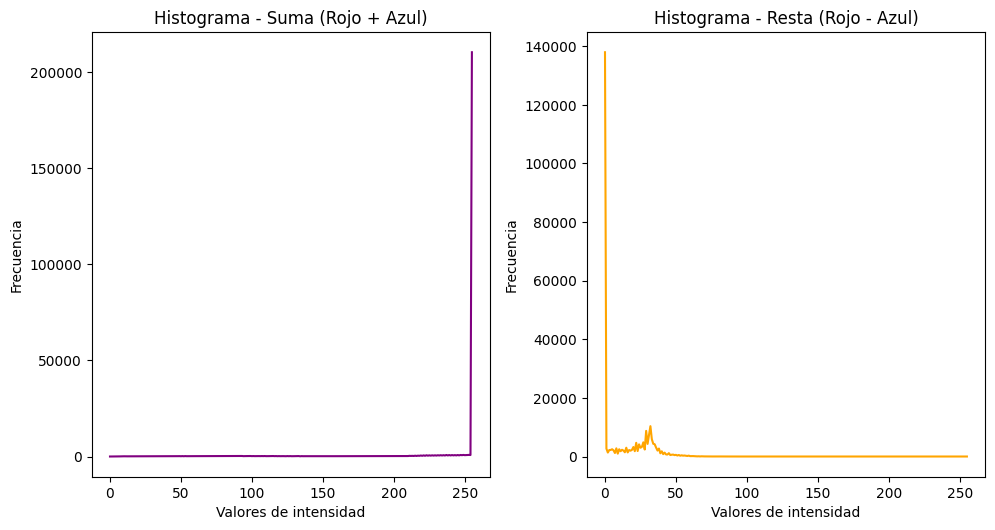

In [40]:
hist_suma = cv2.calcHist([suma], [0], None, [256], [0, 256])
hist_resta = cv2.calcHist([resta], [0], None, [256], [0, 256])

# Mostrar los histogramas
plt.figure(figsize=(15, 10))

# Histogramas de operaciones aritméticas
plt.subplot(2, 3, 1)
plt.plot(hist_suma, color='purple')
plt.title('Histograma - Suma (Rojo + Azul)')
plt.xlabel('Valores de intensidad')
plt.ylabel('Frecuencia')

plt.subplot(2, 3, 2)
plt.plot(hist_resta, color='orange')
plt.title('Histograma - Resta (Rojo - Azul)')
plt.xlabel('Valores de intensidad')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()